# Lista 3

In [70]:
import sys
sys.path.append(f'../FinanceHub')

from calendars import DayCounts
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1

### Flat Forward Interpolation

In [71]:
def flat_forward(du, yields):
    points = []
    for i in range(1, len(du)):
        T1 = du[i-1]
        T2 = du[i]
        R1 = yields[i-1]
        R2 = yields[i]

        points.append([T1, R1])
        points.append([T2, R2])

        for T in range(T1+1, T2):
            r = (R2**((T-T1)/(T2 - T1)))*(R1**((T2-T)/(T2-T1)))
            points.append([T, r])
    return points

In [72]:
def calc_du(reference_date, expiry_dates):
    t = pd.to_datetime(reference_date)
    dc = DayCounts('BUS/252', calendar='anbima')
    du = []
    for date in expiry_dates:
        T = pd.to_datetime(date)
        du.append(dc.days(t, T))
    return du

### LTN Yield curve

In [73]:
starting_date = '2021-02-05'
LTN_expiry_dates = ['2021-04-01', '2021-07-01', '2021-10-01', '2022-01-01',
                    '2022-04-01', '2022-07-01', '2022-10-01', '2023-01-01',
                    '2023-07-01', '2024-01-01', '2024-07-01']
LTN_yield_rates = [
     0.0205800, 0.0238850, 0.0299040, 0.0344630, 0.0401480,
     0.0448470, 0.0491370, 0.0525000, 0.0575190, 0.0611500, 0.0642470
]

LTN_du = calc_du(starting_date, LTN_expiry_dates)

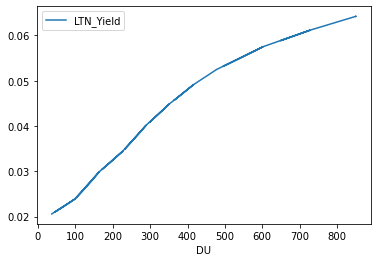

In [74]:
LTN_forward_rate = flat_forward(LTN_du, LTN_yield_rates)
LTN_pd_forward_rate = pd.DataFrame(LTN_forward_rate, columns=["DU", "LTN_Yield"])
LTN_pd_forward_rate.plot(x="DU", y="LTN_Yield")
plt.show()

### NTNF Yield curve

In [75]:
NTNF_yield_rates = [0.051132,0.062152,0.068692,0.073165,0.076390]
NTNF_expiry_dates = [
    '2023-01-01',
    '2025-01-01',
    '2027-01-01',
    '2029-01-01',
    '2031-01-01'
]

NTNF_du = calc_du(starting_date, NTNF_expiry_dates)

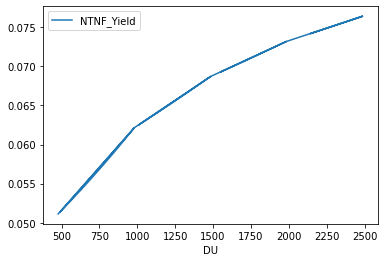

In [76]:
NTNF_forward_rate = flat_forward(NTNF_du, NTNF_yield_rates)
NTNF_pd_forward_rate = pd.DataFrame(NTNF_forward_rate, columns=["DU", "NTNF_Yield"])
NTNF_pd_forward_rate.plot(x="DU", y="NTNF_Yield")
plt.show()

## Exercise 2

In [83]:
from nelson_siegel_svensson.calibrate import calibrate_nss_ols
import numpy as np

sigma1 = 2.2648
sigma2 = 0.3330

years = [d/252 for d in LTN_du]

curve, status = calibrate_nss_ols(np.array(years), np.array(LTN_yield_rates), (sigma1, sigma2))
print(curve)

NelsonSiegelSvenssonCurve(beta0=0.04563985284374065, beta1=-0.02470845206044551, beta2=0.11571060645597667, beta3=-0.028498897811440105, tau1=2.2648, tau2=0.333)


## Exercise 3

### DI

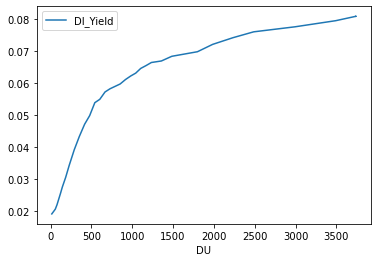

In [77]:
DI_yield_rates = [0.01902,0.0198,0.02051,0.0219,0.0236,0.02548,
                  0.02742,0.02895,0.03047,0.03221,0.0342,0.03586,
                  0.0391, 0.04325, 0.0471, 0.0498, 0.05385, 0.0549,
                  0.0572, 0.0582, 0.0597, 0.0611, 0.06221, 0.0631,
                  0.06457, 0.06547, 0.06643, 0.0669, 0.06837, 0.0698,
                  0.0721, 0.0742, 0.07603, 0.0776, 0.07952, 0.08091, 0.08091]

DI_dates = [
    '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
    '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
    '2022-01-01', '2022-02-01', '2022-04-01',
    '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01', '2023-07-01',
    '2023-10-01', '2024-01-01', '2024-07-01', '2024-10-01', '2025-01-01',
    '2025-04-01', '2025-07-01', '2025-10-01',
    '2026-01-01', '2026-07-01', '2027-01-01', '2028-04-01', '2029-01-01',
    '2030-01-01', '2031-01-01', '2033-01-01', '2035-01-01', '2036-01-01',
]

DI_du = calc_du(starting_date, DI_dates)
DI_forward_rate = flat_forward(DI_du, DI_yield_rates)
DI_pd_forward_rate = pd.DataFrame(DI_forward_rate, columns=["DU", "DI_Yield"])
DI_pd_forward_rate.plot(x="DU", y="DI_Yield")
plt.show()

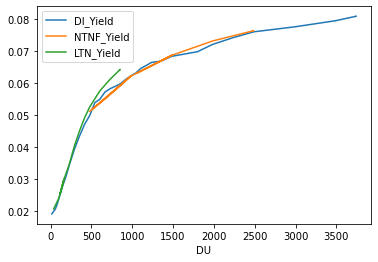

In [78]:
di_plot = DI_pd_forward_rate.plot(x="DU", y="DI_Yield")
ntnf_plot = NTNF_pd_forward_rate.plot(x="DU", y="NTNF_Yield", ax=di_plot)
ltn_plot = LTN_pd_forward_rate.plot(x="DU", y="LTN_Yield", ax=ntnf_plot)



Observando a curva acima, podemos ver que há uma possibilidade de arbitragem começando com o primeiro vencimento da NTNF (inicio da curva laranja) com a curva da LTN.
É possível vender a NTNF com vencimento em 2025, e usar o dinheiro para comprar a LTN com vencimento em 2024. Como a LTN tem um yield maior que a NTNF no vencimento, o valor recebido no vencimento pela LTN é maior que o valor que deve-se pagar pela NTNF vendida, gerando assim um rendimento.

In [ ]:
starting_date = '2023-01-01'
ending_date = '2024-07-01'
notional = 1000
dc = DayCounts('BUS/252', calendar='anbima')
du = dc.days(starting_date, ending_date)
